In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
df['Target'] = iris.target
df.head()

,0,1,2,3,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis='columns'), iris.target, test_size = 0.3)
len(X_train)

105

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [50]:
predict = model.predict(X_test)
predict

array([1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2,
       0])

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 17]])

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

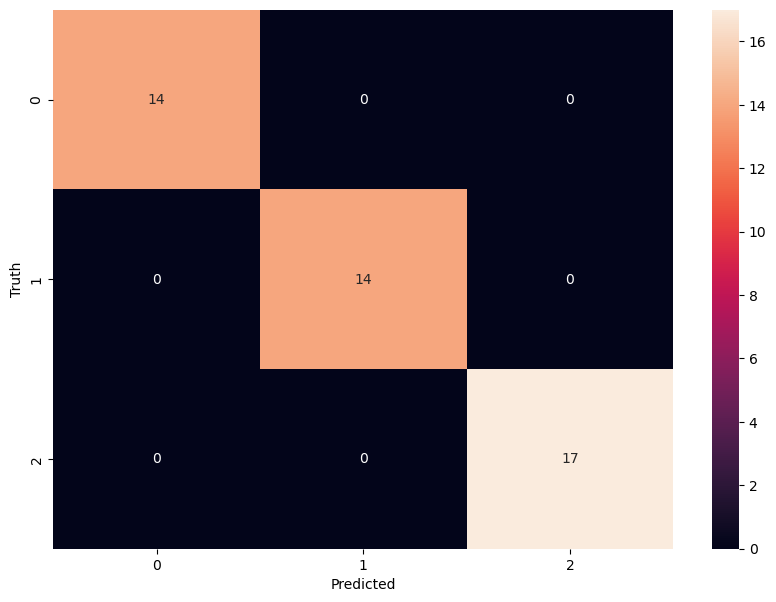

In [54]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')